In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

city_data =  ("data/city_data.csv")
ride_data =  ("data/ride_data.csv")

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

data = pd.merge(city_df, ride_df, how='inner', on='city')
# data=merge_df.drop_duplicates('city')



In [21]:
city_total = data.groupby(['type','city']).agg({'driver_count':'mean',
                                                   'fare':'mean',
                                                   'ride_id':'count'})

city_report = city_total.rename(columns = {"driver_count": "Total Drivers",
                                               "fare": "average fare",
                                               "ride_id": "total rides"})

city_report

Total Drivers  average fare  total rides
type  city                                                         
Rural Bradshawfurt                     7     40.064000           10
      Garzaport                        7     24.123333            3
      Harringtonfort                   4     33.470000            6
      Jessicaport                      1     36.013333            6
      Lake Jamie                       4     34.358333            6
...                                  ...           ...          ...
Urban West Patrickchester             25     28.233125           16
      West Robert                     39     25.123871           31
      West Samuelburgh                73     21.767600           25
      Williamsstad                    59     24.362174           23
      Williamsview                    46     26.599000           20

[120 rows x 3 columns]

## Summary of Data 

In [3]:
## groups by type and city to give me total rides total avg fare and total drivers then changes coloum 

rides_total = data.groupby(['type', 'city'], as_index=False)['ride_id'].count()
avg_fare = data.groupby(['type', 'city'], as_index=False)['fare'].mean()
driver_total = data.groupby(['type', 'city'], as_index=False)['driver_count'].mean()

# Rename colums 
Rides_total= rides_total.rename({'ride_id':'total rides'},axis=1)
Avg_fare = avg_fare.rename({'fare':'average fare'},axis=1)
Driver_total= driver_total.rename({'driver_count':'Total Drivers'},axis=1)

In [4]:
##  Merge two data frames from above in to one 

combined_df = pd.merge(Avg_fare,Rides_total, how='inner', on='city',
                      suffixes=('_m','_n'), indicator=True)
# combined_df['type']= combined_df['type_m'].where(combined_df['type_n'].isnull(),
#                                                 combined_df['type_n'])

# combined_df.drop(['type_m','type_n','_merge'], axis=1, inplace=True)
# combined =combined_df.drop_duplicates('type', keep = 'first')
# combined
combined_df

,type_m,city,average fare,type_n,total rides,_merge
0,Rural,Bradshawfurt,40.064000,Rural,10,both
1,Rural,Garzaport,24.123333,Rural,3,both
2,Rural,Harringtonfort,33.470000,Rural,6,both
3,Rural,Jessicaport,36.013333,Rural,6,both
4,Rural,Lake Jamie,34.358333,Rural,6,both
...,...,...,...,...,...,...
115,Urban,West Patrickchester,28.233125,Urban,16,both
116,Urban,West Robert,25.123871,Urban,31,both
117,Urban,West Samuelburgh,21.767600,Urban,25,both
118,Urban,Williamsstad,24.362174,Urban,23,both


In [5]:
combined_df['type']= combined_df['type_m'].where(combined_df['type_n'].isnull(),
                                                combined_df['type_n'])

combined_df.drop(['type_m','type_n','_merge'], axis=1, inplace=True)
# combined =combined_df.drop_duplicates('type', keep = 'first')
combined_df

,city,average fare,total rides,type
0,Bradshawfurt,40.064000,10,Rural
1,Garzaport,24.123333,3,Rural
2,Harringtonfort,33.470000,6,Rural
3,Jessicaport,36.013333,6,Rural
4,Lake Jamie,34.358333,6,Rural
...,...,...,...,...
115,West Patrickchester,28.233125,16,Urban
116,West Robert,25.123871,31,Urban
117,West Samuelburgh,21.767600,25,Urban
118,Williamsstad,24.362174,23,Urban


In [7]:
## create final data frame adding Driver total 

df = pd.merge(combined_df,Driver_total, how ='inner', on = 'city',
                      suffixes=('_m','_n'), indicator=True)
df['type']= df['type_m'].where(df['type_n'].isnull(),
                                                df['type_n'])
# df[['type','city','city_m','city_n']]
df.drop(['type_m','type_n','_merge'], axis=1, inplace=True)



df

In [10]:
df

,city,average fare,total rides,Total Drivers,type
0,Bradshawfurt,40.064000,10,7,Rural
1,Garzaport,24.123333,3,7,Rural
2,Harringtonfort,33.470000,6,4,Rural
3,Jessicaport,36.013333,6,1,Rural
4,Lake Jamie,34.358333,6,4,Rural
...,...,...,...,...,...
115,West Patrickchester,28.233125,16,25,Urban
116,West Robert,25.123871,31,39,Urban
117,West Samuelburgh,21.767600,25,73,Urban
118,Williamsstad,24.362174,23,59,Urban


<h3>Separate by type <h3>

In [26]:
Suburban = df.loc[df["type"]=="Suburban",:]
Urban = df.loc[df["type"]=="Urban",:]
Rural = df.loc[df["type"]=="Rural",:]

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(Urban,x="total rides", y="average fare",  hovertext=["Total City rides"],
                         
                         marker=dict(size='Total Drivers', color='rosybrown'),
                 
                        mode="markers"))

fig.add_trace(go.Scatter(Suburban,x="total rides", y="average fare", hovertext= ["Average Fare"],hoverinfo= "y",marker=dict(
                size='Total Drivers',
                color='lightgreen'
               ), 
                mode="markers"))

fig.add_trace(go.Scatter(Rural,x="total rides", y="average fare",hovertext= ["Average Fare"], hoverinfo= "y",marker=dict(
                size='Total Drivers',
                color='skyblue'
               ), 
                mode="markers"))

NameError: name 'go' is not defined

In [38]:
import plotly.express as px
import plotly
import plotly.graph_objs as go

In [36]:
fig = px.scatter(Urban, x="total rides", y="average fare",
                size='Total Drivers', hover_data=['Total Drivers','city'])
        
        px.scatter(Rural, x="total rides", y="average fare", color="red"
                size='Total Drivers', hover_data=['Total Drivers','city'])

fig.show()

IndentationError: unexpected indent (<ipython-input-36-068adc95cb9a>, line 4)

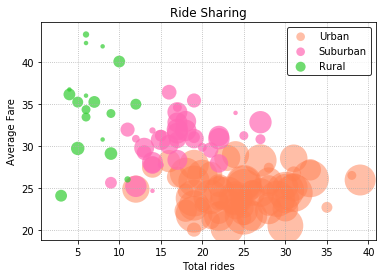

In [30]:


plt.scatter(Urban['total rides'], Urban['average fare'], s = Urban['Total Drivers']*20, color='coral', label = 'Urban',
alpha=0.5, edgecolors='none')                                           
plt.scatter(Suburban['total rides'], Suburban['average fare'], s = Suburban['Total Drivers']*20, color='hotpink',
alpha=0.7, edgecolors='none', label = 'Suburban')  

plt.scatter(Rural['total rides'], Rural['average fare'], s = Rural['Total Drivers']*20, color='limegreen',
alpha=0.7, edgecolors='none', label = 'Rural')
                                             
                                             
                                             
                                             
                                             
plt.grid(linestyle= 'dotted')
plt.xlabel("Total rides")
plt.ylabel('Average Fare')
plt.title('Ride Sharing')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[0]._sizes = [75]


# plt.savefig('ride_sharing_scatter.jpg')
                                             
plt.show()                                             

# Create Bar Graphs 

In [ ]:
type_total_fare= data.groupby(['type'], as_index=False)['fare'].sum()
avg_type_fare =data.groupby(['type'], as_index=False)['fare'].mean()
type_total_rides =data.groupby(['type'], as_index=False)['ride_id'].count()
drivers_total = =data.groupby(['type'], as_index=False)['driver_count'].sum()